In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import linear_model  # sklearn으로 logistic 구현
from sklearn.preprocessing import MinMaxScaler  # 정규화 진행
from sklearn.model_selection import train_test_split
from scipy import stats   # 이상치 처리
import matplotlib.pyplot as plt
import warnings

new = pd.read_csv('/jupyter_home/Machine_Learning/5th_ML_Project/온도, 습도, co2 data/nature_data.csv')

new = new.drop(['Unnamed: 0'],axis=1)
display(new)

,기온(℃),상대습도( %),co2,label
0,-11.3,47.0,6589,1
1,-10.2,44.0,1920,1
2,-10.1,42.0,1536,1
3,-10.2,42.0,5109,1
4,-10.6,44.0,184,1
...,...,...,...,...
508982,17.6,84.0,3987,1
508983,17.6,86.0,3109,1
508984,17.5,85.0,2622,1
508985,17.7,81.0,1311,1


In [2]:
new['label'].value_counts()

1    423302
0     85685
Name: label, dtype: int64

In [3]:
# 이상치
#zscore_threshold = 2.0

#for col in ['기온(℃)','상대습도( %)','co2']:
#    outlier = new[col][np.abs(stats.zscore(new[col])) > zscore_threshold]
#    new = new.loc[~new[col].isin(outlier)]

In [4]:
new = new.drop(new.loc[new['기온(℃)'] < -20].index)

<BarContainer object of 2 artists>

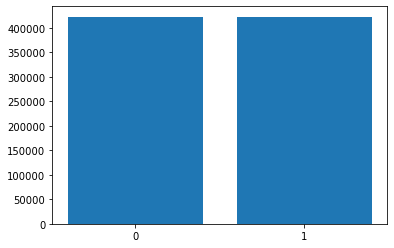

In [5]:
x_data = new[['기온(℃)','상대습도( %)','co2']]
t_data = new['label']

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_data,t_data = ros.fit_resample(x_data,t_data)

# plt.bar(x_data, t_data)
plt.bar(['0','1'],t_data.value_counts())

In [6]:
scaler = MinMaxScaler()
scaler.fit(x_data)

norm_x_data = scaler.transform(x_data)
print(norm_x_data)

[[0.15779817 0.43617021 0.94013725]
 [0.17798165 0.40425532 0.25843189]
 [0.17981651 0.38297872 0.20236531]
 ...
 [0.31192661 0.57446809 0.45904512]
 [0.60183486 0.5        0.73893999]
 [0.57614679 0.56382979 0.57220032]]


In [7]:
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(norm_x_data,
                 t_data,
                 test_size = 0.2,
                 random_state=2,
                 stratify=t_data)
print(train_x_data.shape, train_t_data.shape) 

(675856, 3) (675856,)


In [8]:
from sklearn import linear_model

model = linear_model.LogisticRegression()

model.fit(train_x_data, train_t_data)
test_score = model.score(test_x_data, test_t_data)
print(test_score) # accuracy

0.5734180062025047


In [9]:
# 이상치 제거x, 정규화x, train_test_split    0.579402436791656
# 이상치 제거x, 정규화o, train_test_split    0.570909692241364
# z-score 이상치 제거, 정규화o, train_test_split   0.5714089020177239
# z-score 이상치 제거, 정규화x, train_test_split   0.5729797726931357

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

# tensorflow 구현

keras_model = Sequential()
keras_model.add(Flatten(input_shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))
keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
keras_model.fit(train_x_data,
                train_t_data,
                epochs=100,
                verbose=1)  # verbos=1은 학습하는걸 출력해서 보겠다는것
                            # verbose=0은 출력하지 않음
    
keras_result = keras_model.evaluate(test_x_data,test_t_data)
print('Tensorflow 2.x 정확도 : {}'.format(keras_result))

Epoch 1/100
21121/21121 [==============================] - 11s 520us/step - loss: 0.6766 - accuracy: 0.5685
Epoch 2/100
21121/21121 [==============================] - 11s 504us/step - loss: 0.6677 - accuracy: 0.5725
Epoch 3/100
21121/21121 [==============================] - 11s 508us/step - loss: 0.6677 - accuracy: 0.5724
Epoch 4/100
21121/21121 [==============================] - 11s 507us/step - loss: 0.6677 - accuracy: 0.5725
Epoch 5/100
21121/21121 [==============================] - 11s 508us/step - loss: 0.6676 - accuracy: 0.5726
Epoch 6/100
21121/21121 [==============================] - 11s 501us/step - loss: 0.6676 - accuracy: 0.5725
Epoch 7/100
21121/21121 [==============================] - 12s 551us/step - loss: 0.6676 - accuracy: 0.5721
Epoch 8/100
21121/21121 [==============================] - 11s 532us/step - loss: 0.6676 - accuracy: 0.5727
Epoch 9/100
21121/21121 [==============================] - 11s 535us/step - loss: 0.6676 - accuracy: 0.5725
Epoch 10/100
21121/21121 [==

21121/21121 [==============================] - 14s 677us/step - loss: 0.6676 - accuracy: 0.5723
Epoch 75/100
21121/21121 [==============================] - 15s 693us/step - loss: 0.6676 - accuracy: 0.5722
Epoch 76/100
21121/21121 [==============================] - 13s 622us/step - loss: 0.6677 - accuracy: 0.5723
Epoch 77/100
21121/21121 [==============================] - 13s 617us/step - loss: 0.6676 - accuracy: 0.5724
Epoch 78/100
21121/21121 [==============================] - 14s 657us/step - loss: 0.6676 - accuracy: 0.5724
Epoch 79/100
21121/21121 [==============================] - 15s 695us/step - loss: 0.6677 - accuracy: 0.5724
Epoch 80/100
21121/21121 [==============================] - 14s 654us/step - loss: 0.6676 - accuracy: 0.5723
Epoch 81/100
21121/21121 [==============================] - 13s 609us/step - loss: 0.6676 - accuracy: 0.5724
Epoch 82/100
21121/21121 [==============================] - 14s 645us/step - loss: 0.6677 - accuracy: 0.5723
Epoch 83/100
21121/21121 [======

In [11]:
from sklearn.metrics import classification_report

# insert_data = scaler.transform(np.array([[10, 25, 1700]]))
predict_val = keras_model.predict(test_x_data) 
bin_predict = tf.round(predict_val).numpy().flatten()
print(classification_report(test_t_data, bin_predict))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58     84482
           1       0.58      0.56      0.57     84482

    accuracy                           0.57    168964
   macro avg       0.57      0.57      0.57    168964
weighted avg       0.57      0.57      0.57    168964



In [45]:
insert_data = scaler.transform(np.array([[10, 25, 1700]]))
predict_val = keras_model.predict(insert_data)    # 0 or 1로 결과 도출
predict_proba = keras_model.predict_proba(insert_data) # 확률값으로 결과를 도출

print('sklearn의 결과 : 합격여부 : {}, 확률 : {}'.format(predict_val, 
                                                         predict_proba))

C:\Users\yeop\.conda\envs\machine_TF2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Instructions for updating:
Please use `model.predict()` instead.
sklearn의 결과 : 합격여부 : [[0.6512024]], 확률 : [[0.6512024]]


In [44]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_x_data, train_t_data)
acc = knn_classifier.score(test_x_data, test_t_data)
print('KNN의 accuracy : {}'.format(acc))


insert_data = scaler.transform(np.array([[10, 25, 1700]]))
predict_val = knn_classifier.predict(insert_data)    # 0 or 1로 결과 도출
predict_proba = knn_classifier.predict_proba(insert_data) # 확률값으로 결과를 도출

print('sklearn의 결과 : 합격여부 : {}, 확률 : {}'.format(predict_val, 
                                                         predict_proba))

from sklearn.metrics import classification_report
pred = knn_classifier.predict(test_x_data)
print(classification_report(pred, test_t_data))
      
      

KNN의 accuracy : 0.998397837080058
sklearn의 결과 : 합격여부 : [1], 확률 : [[0. 1.]]


C:\Users\yeop\.conda\envs\machine_TF2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80116
           1       1.00      1.00      1.00     79668

    accuracy                           1.00    159784
   macro avg       1.00      1.00      1.00    159784
weighted avg       1.00      1.00      1.00    159784



In [42]:
insert_data

array([[0.85555556, 0.35526316, 0.12410571]])

In [40]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(train_x_data, train_t_data)

print("훈련 세트 정확도: {:.3f}".format(tree.score(train_x_data, train_t_data)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(test_x_data, test_t_data)))

insert_data = scaler.transform(np.array([[19, 58, 6000]]))
predict_val = tree.predict(insert_data)    # 0 or 1로 결과 도출
predict_proba = tree.predict_proba(insert_data) # 확률값으로 결과를 도출

print('sklearn의 결과 : 합격여부 : {}, 확률 : {}'.format(predict_val, 
                                                         predict_proba))

from sklearn.metrics import classification_report
pred = tree.predict(test_x_data)
print(classification_report(pred, test_t_data))

훈련 세트 정확도: 0.998
테스트 세트 정확도: 0.998
sklearn의 결과 : 합격여부 : [0], 확률 : [[0.99612544 0.00387456]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80227
           1       1.00      1.00      1.00     79557

    accuracy                           1.00    159784
   macro avg       1.00      1.00      1.00    159784
weighted avg       1.00      1.00      1.00    159784



C:\Users\yeop\.conda\envs\machine_TF2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
